In [1]:
!pip install osmnx >> log.txt
!pip install matplotlib >> log.txt
!pip install optalgotools >> log.txt
!pip install folium >> log.txt
!pip install tqdm >> log.txt

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt


30.27263125 120.10764837409579


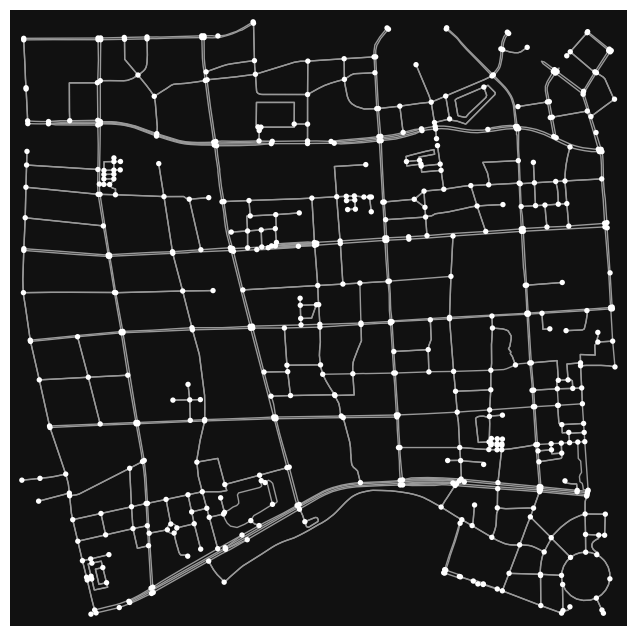

In [19]:
road1 = "古荡路"
road2 = "余杭塘路"
place_name1 = "Gudang, Hangzhou, China"
place_name2 = road1 + " & " + road2
latitude, longitude = ox.geocode(place_name2)
print(latitude, longitude)
GuDang = (30.284698, 120.109238)


# fetch OSM street network (drive, walk, private, etc.) from the location

# find by place name
# graph = ox.graph_from_address(place_name1, network_type='drive', dist=3100)

# find by coordinate
graph = ox.graph_from_point(GuDang, network_type='drive', dist=2100)



# intersection = ox.intersection_from_address(place_name, road1, road2)

fig, ax = ox.plot_graph(graph)


In [40]:
nodes, edges = ox.graph_to_gdfs(graph)

# Filter nodes that have the 'highway' attribute set to 'traffic_signals'
traffic_lights = nodes[nodes['highway'] == 'traffic_signals']
# print(traffic_lights)
# 30.275918, 120.100727
# 30.276076, 120.110777
# 30.281993, 120.109132
# 30.281756, 120.099814
# 30.286588, 120.098738
# 30.294818, 120.097855
# 30.294894, 120.097944
30.295046, 120.097944
30.300075, 120.097855


x, y =30.289251, 120.092349 



# print(traffic_lights.filter(['y', 'x']==['30.281835', '120.109041']))
target_node = traffic_lights[(abs(traffic_lights['x'] - y) < 0.01) & (abs(traffic_lights['y'] - x) < 0.01)]
# osmid_of_target_node = target_node['id'].values[0]
# target_node
edges
# print(traffic_lights['geometry'])
# graph

osmid  oneway lanes  name  \
u           v          key                                               
26041464    335504151  0                 582799452    True     2  天目山路   
            270413772  0                 582799453    True     2   学院路   
26197702    26705481   0                 571884279    True     4   文三路   
            344625927  0    [571884280, 594458441]    True     2   学院路   
26197704    30067170   0                 594805183   False     1   万塘路   
...                                            ...     ...   ...   ...   
11065317836 5657625522 0    [592899259, 592899262]    True   NaN   NaN   
            8881860194 0                1197749108    True   NaN  天目山路   
11112434618 270413760  0                 514391101   False     1   万塘路   
            335504151  0                1197749110    True   NaN  天目山路   
            5395185875 0                 514391101   False     1   万塘路   

                               highway reversed   length maxspeed  \
u           v          key                                          
26041464    335504151  0     secondary    False  292.340      NaN   
            270413772  0     secondary    False   12.525       50   
26197702    26705481   0     secondary    False  309.294      NaN   
            344625927  0     secondary    False  268.350       50   
26197704    30067170   0      tertiary     True  147.625      NaN   
...                                ...      ...      ...      ...   
11065317836 5657625522 0    trunk_link    False  354.639      NaN   
            8881860194 0     secondary    False  370.066      NaN   
11112434618 270413760  0      tertiary    False   16.885      NaN   
            335504151  0     secondary    False  261.163      NaN   
            5395185875 0      tertiary     True  130.051      NaN   

                                                                     geometry  \
u           v          key                                                      
26041464    335504151  0    LINESTRING (120.12550 30.27406, 120.12247 30.2...   
            270413772  0    LINESTRING (120.12550 30.27406, 120.12551 30.2...   
26197702    26705481   0    LINESTRING (120.12507 30.27913, 120.12186 30.2...   
            344625927  0    LINESTRING (120.12507 30.27913, 120.12509 30.2...   
26197704    30067170   0    LINESTRING (120.11948 30.27879, 120.11936 30.2...   
...                                                                       ...   
11065317836 5657625522 0    LINESTRING (120.11548 30.27417, 120.11618 30.2...   
            8881860194 0    LINESTRING (120.11548 30.27417, 120.11618 30.2...   
11112434618 270413760  0    LINESTRING (120.11977 30.27454, 120.11964 30.2...   
            335504151  0    LINESTRING (120.11977 30.27454, 120.12247 30.2...   
            5395185875 0    LINESTRING (120.11977 30.27454, 120.11978 30.2...   

                           bridge width tunnel access  
u           v          key                             
26041464    335504151  0      NaN   NaN    NaN    NaN  
            270413772  0      NaN   NaN    NaN    NaN  
26197702    26705481   0      NaN   NaN    NaN    NaN  
            344625927  0      NaN   NaN    NaN    NaN  
26197704    30067170   0      NaN   NaN    NaN    NaN  
...                           ...   ...    ...    ...  
11065317836 5657625522 0      NaN   NaN    yes    NaN  
            8881860194 0      NaN   NaN    NaN    NaN  
11112434618 270413760  0      NaN   NaN    NaN    NaN  
            335504151  0      NaN   NaN    NaN    NaN  
            5395185875 0      NaN   NaN    NaN    NaN  

[1313 rows x 13 columns]

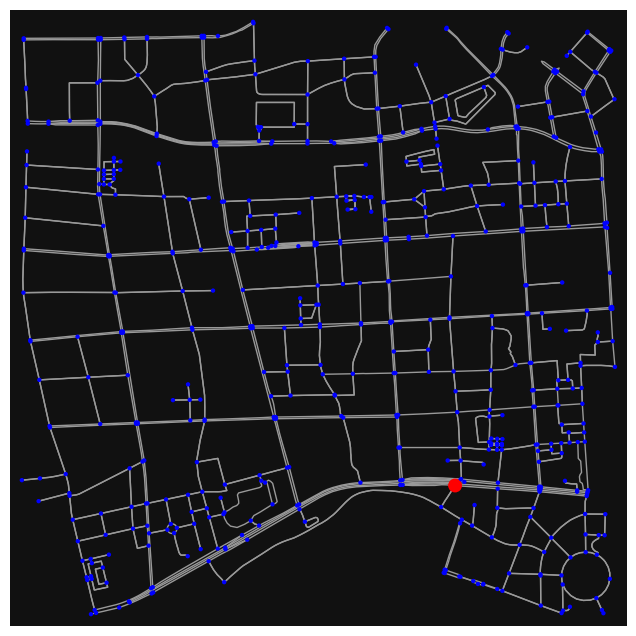

In [41]:
# Suppose the node IDs of the two nodes you want to highlight are 1234567890 and 9876543210
# node1_id = 26197709 # 30.284443	120.114585         2, 3
# node1_id = 3382408994 # 30.278606	120.115016      1,3
# node1_id = 26496837 # 30.278366	120.106039     1,2
# node1_id = 26607405  # 30.284117	120.10446     2,2
# node1_id =  332556593 # 30.283895	120.094802   2,1
# node1_id = 332556598 # 30.288751	120.093849   3,1
# node1_id =  33720424 # 30.289040	120.102869      3,2
# node1_id = 262910008  # 30.289688	120.114313      3,3
node1_id = 8881860194
# print(graph[332556593][332556596])
# for node1_id in target_node:
    # print(node1_id)
    # Create a list of node colors: default color for most nodes and a special color for the highlighted nodes
nc = ['r' if node == node1_id else 'b' for node in graph.nodes()]

# Create a list of node sizes: larger size for the highlighted nodes and default size for the rest
ns = [100 if node == node1_id else 10 for node in graph.nodes()]

# Plot the graph with the specified node colors and sizes
fig, ax = ox.plot_graph(graph, node_color=nc, node_size=ns)


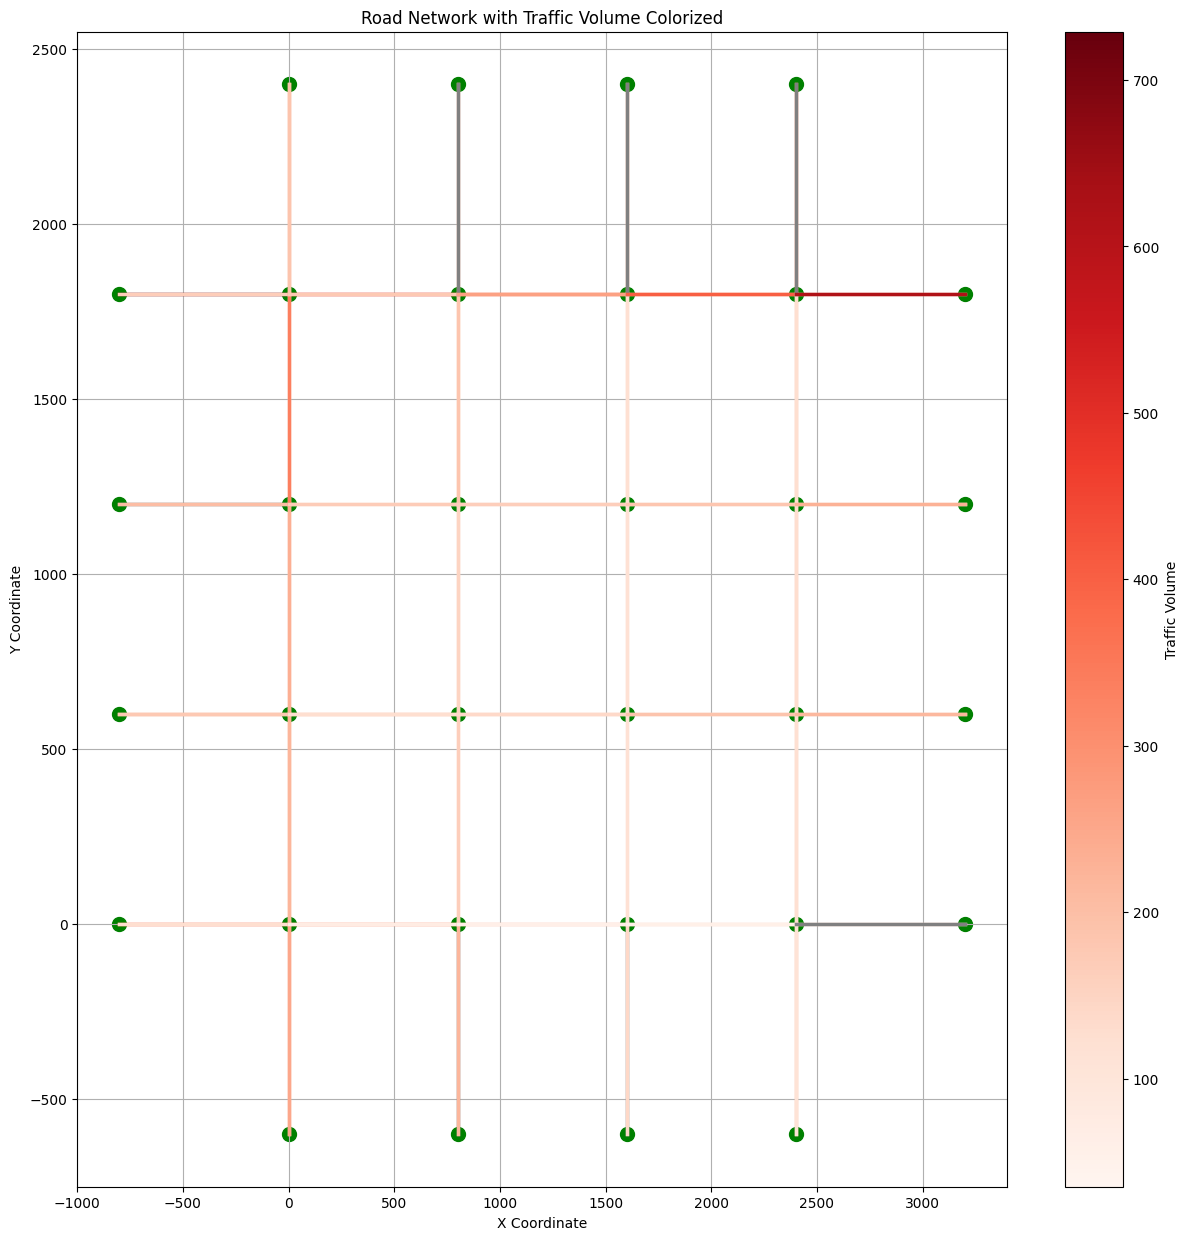

In [6]:
import json
import matplotlib.pyplot as plt
import argparse


with open("./hangzhou_4x4_gudang_18041610_1h/roadnet_4X4.json", 'r') as road_file:
    road_data = json.load(road_file)

# Load the newly uploaded data
with open("./hangzhou_4x4_gudang_18041610_1h/hangzhou_4x4_gudang_18041610_1h.json", "r") as file:
    new_volume_data = json.load(file)
    
# with open("../data/Jinan/3_4/roadnet_3_4.json", 'r') as road_file:
#     road_data = json.load(road_file)

# # Load the newly uploaded data
# with open("../data/Jinan/3_4/anon_3_4_jinan_real.json", "r") as file:
#     new_volume_data = json.load(file)
    
# Calculate the traffic volume on each road segment

# Initialize a dictionary to store the traffic volume for each road segment
traffic_volume = {}

# Loop through each vehicle's route to compute the traffic volume
for entry in new_volume_data:
    route = entry["route"]
    for road_segment in route:
        if road_segment not in traffic_volume:
            traffic_volume[road_segment] = 0
        traffic_volume[road_segment] += 1

# Visualize the (3|4)x4 road map with roads colorized based on traffic volume

fig, ax = plt.subplots(figsize=(15, 15))

# Set a colormap for traffic volume
norm = plt.Normalize(min(traffic_volume.values()), max(traffic_volume.values()))
cmap = plt.get_cmap("Reds")

# Draw roads
for road in road_data["roads"]:
    start_point = road["points"][0]
    end_point = road["points"][1]
    road_id = road["id"]
    if road_id in traffic_volume:
        color = cmap(norm(traffic_volume[road_id]))
    else:
        color = "gray"  # Default color for roads with no traffic data
    plt.plot([start_point["x"], end_point["x"]], [start_point["y"], end_point["y"]], color=color, linewidth=2.5)

# Draw intersections
for intersection in road_data["intersections"]:
    plt.scatter(intersection["point"]["x"], intersection["point"]["y"], s=100, c='g', marker='o')

# Add colorbar to indicate traffic volume
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Traffic Volume")

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Road Network with Traffic Volume Colorized')
plt.grid(True)
plt.show()


Execution time: 0.016896963119506836 seconds


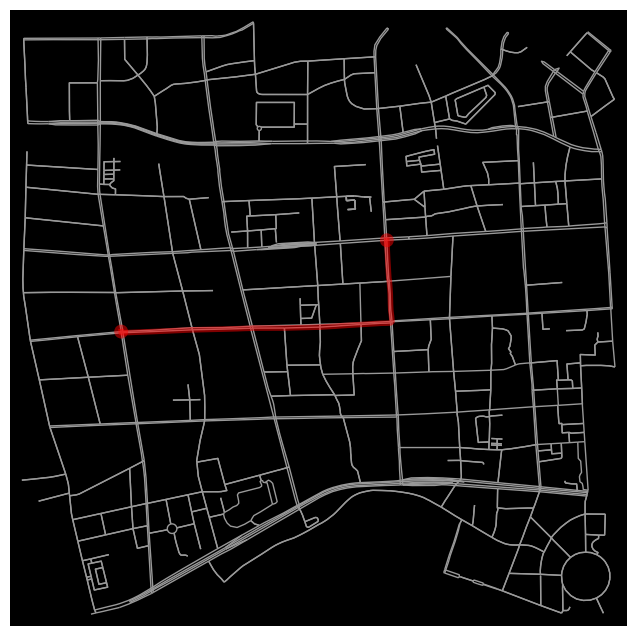

In [98]:
import networkx as nx

# Specify the start and end nodes
start_node = 332556593
end_node = 262910008

import time

start_time = time.time()

# Generate a BFS tree from the start node
bfs_tree = nx.bfs_tree(graph, source=start_node)

# Traverse the BFS tree to get the route from the start node to the end node
bfs_route = [end_node]
while bfs_route[-1] != start_node:
    bfs_route.append(list(bfs_tree.predecessors(bfs_route[-1]))[0])
bfs_route = bfs_route[::-1]  # reverse the route to start from the start node

end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

# Plot the route
fig, ax = ox.plot_graph_route(graph, bfs_route, route_linewidth=4, node_size=0, bgcolor='k')

from optalgotools import routing

routing.draw_route(graph, bfs_route)



Execution time: 0.000926971435546875 seconds


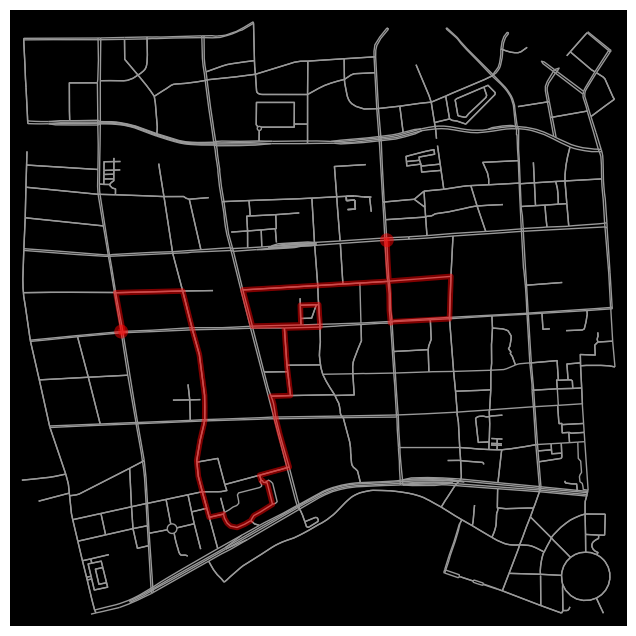

In [109]:

# Specify the start and end nodes
start_node = 332556593
end_node = 262910008

start_time = time.time()

# Get the predecessors of each node in the DFS traversal
dfs_predecessors = nx.dfs_predecessors(graph, source=start_node)

# Traverse the predecessors to get the route from the start node to the end node
dfs_route = [end_node]
while dfs_route[-1] != start_node:
    dfs_route.append(dfs_predecessors[dfs_route[-1]])
dfs_route = dfs_route[::-1]  # reverse the route to start from the start node

end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

# Plot the route
fig, ax = ox.plot_graph_route(graph, dfs_route, route_linewidth=4, node_size=0, bgcolor='k')

routing.draw_route(graph, dfs_route)


Execution time: 0.002168893814086914 seconds


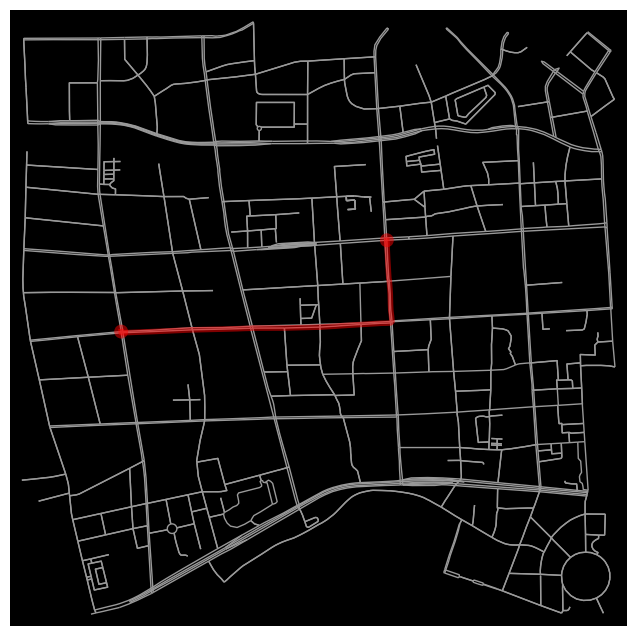

In [106]:
start_time = time.time()

# Find the shortest path using Dijkstra's algorithm
dijkstra_route = nx.shortest_path(graph, source=start_node, target=end_node, method='dijkstra')

end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")

# Plot the route
fig, ax = ox.plot_graph_route(graph, dijkstra_route, route_linewidth=4, node_size=0, bgcolor='k')

routing.draw_route(graph, dijkstra_route)

In [61]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Radius of Earth in kilometers

    return distance

def cal_distance_with_id(osmid_1, osmid_2):

    # Fetch the nodes' data
    node_1 = graph.nodes[osmid_1]
    node_2 = graph.nodes[osmid_2]

    # Extract the coordinates
    lat1, lon1 = node_1['y'], node_1['x']
    lat2, lon2 = node_2['y'], node_2['x']
    distance = haversine_distance(lat1, lon1, lat2, lon2)

    # print(f"Distance between nodes {osmid_1} and {osmid_2}: {distance} km")

    return distance

# e.g. distance between nodes id 332556593 and 332556598, unit of km
cal_distance_with_id(332556593, 332556598)

0.5476831967133818

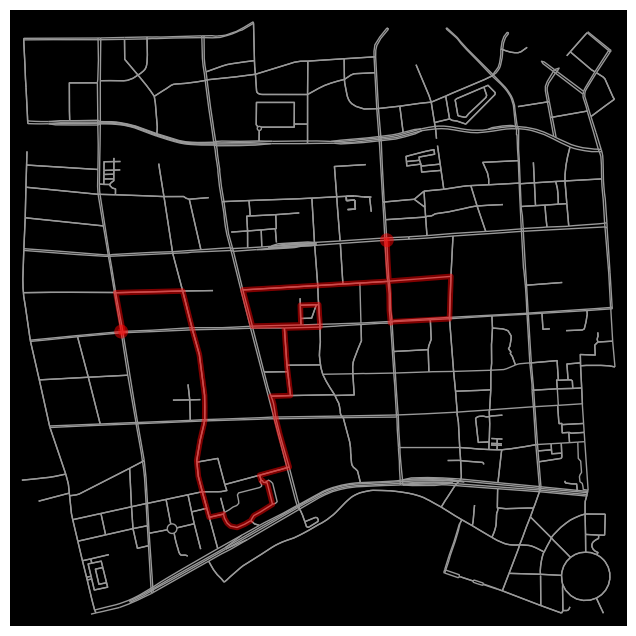

8.526621070808249
61
no annealing
7.525995803581767
61
annealing
105
no annealing
7.248730919558608
105
annealing
217
no annealing
7.021273054663541
217
annealing
302
no annealing
6.672129504304109
302
annealing
4142
no annealing
6.19419488248828
4142
annealing
4199
no annealing
6.1632390501555845
4199
annealing
5675
no annealing
6.120962703622275
5675
annealing
6.120962703622275


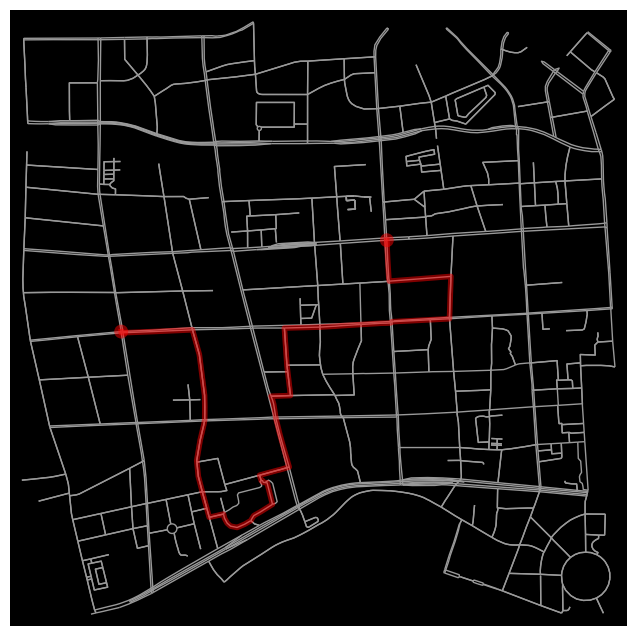

In [111]:

# We set the initial solution to be the route we got from the DFS traversal
route = dfs_route


import random

def cost(route):
    total_cost = 0
    # print(route)
    for u, v in zip(route[:-1], route[1:]):
        try:
            total_cost += cal_distance_with_id(u, v)
        except KeyError:
            # With the current modification, there should be no KeyError.
            with open("error.txt", "a") as f:  # "a" mode appends to the file if it exists
                print(u, v)
                print("Error calculating cost between nodes {u} and {v}.", file=f) 
            return float('inf')
    
    # print(total_cost)
    return total_cost
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')

print(cost(route))

# update function 1
def get_neighbour(route):
    idx1, idx2 = random.sample(range(1, len(route)-1), 2)
    new_route = route[:]
    new_route[idx1], new_route[idx2] = new_route[idx2], new_route[idx1]
    return new_route

# update function 2
def dfs_vibration(route):
    idx1, idx2 = random.sample(range(1, len(route)-1), 2)
    
    start_node = route[idx1 if idx1 < idx2 else idx2]
    end_node = route[idx2 if idx1 < idx2 else idx1]
    
    # Get the predecessors of each node in the DFS traversal
    dfs_predecessors = nx.dfs_predecessors(graph, source=start_node)

    # Traverse the predecessors to get the route from the start node to the end node
    dfs_route = [end_node]
    while dfs_route[-1] != start_node:
        dfs_route.append(dfs_predecessors[dfs_route[-1]])
    dfs_route = dfs_route[::-1]  # reverse the route to start from the start node
    
    route = route[:idx1] + dfs_route + route[idx2+1:]
    
    return route
    

def simulated_annealing(route, T=100, alpha=0.999, stopping_T=0.01):
    current_route = route[:]
    current_cost = cost(current_route)
    best_route = route[:]
    best_cost = current_cost
    i = 0
    while T > stopping_T:
        neighbour = dfs_vibration(current_route)
        neighbour_cost = cost(neighbour)
        
        if neighbour_cost < best_cost:
            print(i)
            print('no annealing')
            best_cost = neighbour_cost
            print(best_cost)
            best_route = neighbour[:] 
            
        if neighbour_cost < current_cost or random.random() < 2 * (current_cost - neighbour_cost) / T:
            print(i)
            print('annealing')
            current_route = neighbour[:]
            current_cost = neighbour_cost
        
        T *= alpha
        i += 1

    return best_route

initial_route = route  # replace with the list of nodes you want to visit

optimized_route = simulated_annealing(initial_route)
print(cost(optimized_route))
fig, ax = ox.plot_graph_route(graph, optimized_route, route_linewidth=4, node_size=0, bgcolor='k')

# fig, ax = ox.plot_graph(graph, node_size=0, show=False, close=False)
# ax.scatter([graph.nodes[node]['x'] for node in optimized_route],
#            [graph.nodes[node]['y'] for node in optimized_route],
#            c='red', s=50) 
# plt.show()

# optimized_route 
# route
# Plot the optimized route
# fig, ax = ox.plot_graph_route(graph, optimized_route, route_linewidth=4, node_size=0, bgcolor='k')
# fig, ax = ox.plot_graph_route(graph, optimized_route, route_linewidth=4, node_size=0, bgcolor='k')